In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)



In [85]:
df = pd.read_csv("car_data.csv")

In [86]:
x = df['Mileage'].reshape(-1, 1)
y = df['Price'].reshape(-1, 1)
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

Intercept: [ 24764.55900606]
Coefficient: [[-0.1725205]]


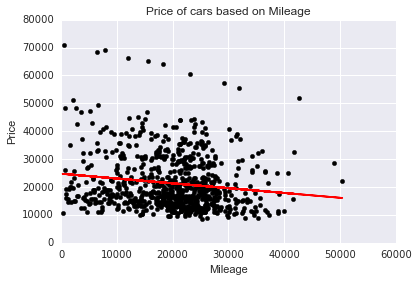

In [87]:
plt.scatter(x, y, color='black')
plt.plot(x, linreg.predict(x), color='red')
plt.xlabel('Mileage')
plt.xlim([0, 60000])
plt.ylabel('Price')
plt.title('Price of cars based on Mileage')
plt.show()

In [88]:
print('R-squared:', linreg.score(x,y))

R-squared: 0.0204634473235


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.



In [89]:
# feature_cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
y = df.Price.reshape(-1, 1)

a = df.Mileage.reshape(-1, 1)
lra = linear_model.LinearRegression()
lra.fit(a, y)
print('Mileage')
print('Intercept:', lra.intercept_)
print('Coefficient:', lra.coef_)
print('R-squared:', lra.score(a, y))

b = df.Cylinder.reshape(-1, 1)
lrb = linear_model.LinearRegression()
lrb.fit(b, y)
print('\nCylinder')
print('Intercept:', lrb.intercept_)
print('Coefficient:', lrb.coef_)
print('R-squared:', lrb.score(b, y))

c = df.Liter.reshape(-1, 1)
lrc = linear_model.LinearRegression()
lrc.fit(c, y)
print('\nLiter')
print('Intercept:', lrc.intercept_)
print('Coefficient:', lrc.coef_)
print('R-squared:', lrc.score(c, y))

d = df.Doors.reshape(-1, 1)
lrd = linear_model.LinearRegression()
lrd.fit(d, y)
print('\nDoors')
print('Intercept:', lrd.intercept_)
print('Coefficient:', lrd.coef_)
print('R-squared:', lrd.score(d, y))

e = df.Cruise.reshape(-1, 1)
lre = linear_model.LinearRegression()
lre.fit(e, y)
print('\nCruise')
print('Intercept:', lre.intercept_)
print('Coefficient:', lre.coef_)
print('R-squared:', lre.score(e, y))

f = df.Sound.reshape(-1, 1)
lrf = linear_model.LinearRegression()
lrf.fit(f, y)
print('\nSound')
print('Intercept:', lrf.intercept_)
print('Coefficient:', lrf.coef_)
print('R-squared:', lrf.score(f, y))

g = df.Leather.reshape(-1, 1)
lrg = linear_model.LinearRegression()
lrg.fit(g, y)
print('\nLeather')
print('Intercept:', lrg.intercept_)
print('Coefficient:', lrg.coef_)
print('R-squared:', lrg.score(g, y))


Mileage
Intercept: [ 24764.55900606]
Coefficient: [[-0.1725205]]
R-squared: 0.0204634473235

Cylinder
Intercept: [-17.05748707]
Coefficient: [[ 4054.20250438]]
R-squared: 0.323859037595

Liter
Intercept: [ 6185.75468278]
Coefficient: [[ 4990.39345781]]
R-squared: 0.311526744279

Doors
Intercept: [ 27033.60029005]
Coefficient: [[-1613.23238515]]
R-squared: 0.0192514665915

Cruise
Intercept: [ 13921.86566691]
Coefficient: [[ 9862.32659956]]
R-squared: 0.185633009297

Sound
Intercept: [ 23130.14437939]
Coefficient: [[-2631.40749469]]
R-squared: 0.0154623876242

Leather
Intercept: [ 18828.77592762]
Coefficient: [[ 3473.4566033]]
R-squared: 0.0247108512641


#### Conclusions
All the data points listed don't seem to be a very good fit, but of these choices - the cylinder and liter size of the engine seem to be the best predictors

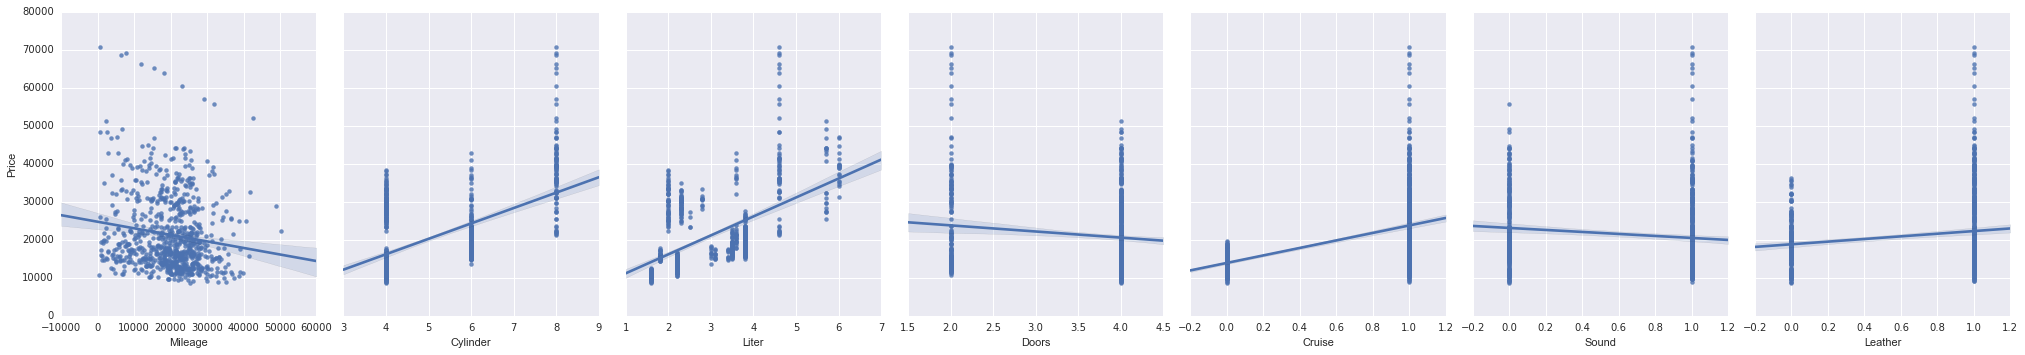

In [91]:
sns.pairplot(df, x_vars=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], y_vars=["Price"],
             size=5, aspect=.8, kind="reg")
plt.show()

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [148]:
map_make = {'Buick': 1, 'Cadillac': 2, 'Chevrolet': 3, 'Pontiac': 4, 'SAAB': 5, 'Saturn': 6}
new_make = df.replace({'Make': map_make})

map_model = {'9-2X AWD': 1, '9_3': 2, '9_3 HO': 3, '9_5': 4, 
             '9_5 HO': 5, 'AVEO': 6, 'Bonneville': 7, 'CST-V': 8,
             'CTS': 9, 'Cavalier': 10, 'Century': 11, 'Classic': 12,
             'Cobalt': 13, 'Corvette': 14, 'Deville': 15, 'G6': 16,
             'GTO': 17, 'Grand Am': 18, 'Grand Prix': 19, 'Impala': 20,
             'Ion': 21, 'L Series': 22, 'Lacrosse': 23, 'Lesabre': 24,
             'Malibu': 25, 'Monte Carlo': 26, 'Park Avenue': 27, 'STS-V6': 28,
             'STS-V8': 29, 'Sunfire': 30, 'Vibe': 31, 'XLR-V8': 32}
new_model = new_make.replace({'Model': map_model})

map_type = {'Convertible': 1, 'Coupe': 2, 'Hatchback': 3, 'Sedan': 4, 'Wagon': 5}
new_type = new_model.replace({'Type': map_type})

In [149]:
# dummy_make = pd.get_dummies(make)
# dummy_model = pd.get_dummies(model)
# dummy_model.transpose()
# dummy_type = pd.get_dummies(car_type)

In [150]:
y = df.Price.reshape(-1, 1)

make = new_type.Make.reshape(-1, 1)
lr_make = linear_model.LinearRegression()
lr_make.fit(make, y)
print('Make')
print('Intercept:', lr_make.intercept_)
print('Coefficient:', lr_make.coef_)
print('R-squared:', lr_make.score(make, y))


model = new_type.Model.reshape(-1, 1)
lr_model = linear_model.LinearRegression()
lr_model.fit(model, y)
print('\nModel')
print('Intercept:', lr_model.intercept_)
print('Coefficient:', lr_model.coef_)
print('R-squared:', lr_model.score(model, y))

car_type = new_type.Type.reshape(-1, 1)
lr_type = linear_model.LinearRegression()
lr_type.fit(car_type, y)
print('\nType')
print('Intercept:', lr_type.intercept_)
print('Coefficient:', lr_type.coef_)
print('R-squared:', lr_type.score(car_type, y))

Make
Intercept: [ 24665.57304332]
Coefficient: [[-978.47367689]]
R-squared: 0.0173300232768

Model
Intercept: [ 21821.44561411]
Coefficient: [[-30.1990486]]
R-squared: 0.000707500235345

Type
Intercept: [ 26628.43176748]
Coefficient: [[-1523.0722409]]
R-squared: 0.0268538470872


In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 6))
axs[0].scatter(make, y)
axs[0].plot(make, lr_make.predict(make), color='red')
axs[0].set_xlabel('Make')
axs[0].set_ylabel('Price')

axs[1].scatter(model, y)
axs[1].plot(model, lr_model.predict(model), color='red')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Price')

axs[2].scatter(car_type, y)
axs[2].plot(car_type, lr_type.predict(car_type), color='red')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Price')
